In [7]:
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Data/Stock_History/closing.csv')
df = df.dropna(axis=1)
df = df.drop('Date', axis=1)

# Extract the closing prices
closing_prices = df

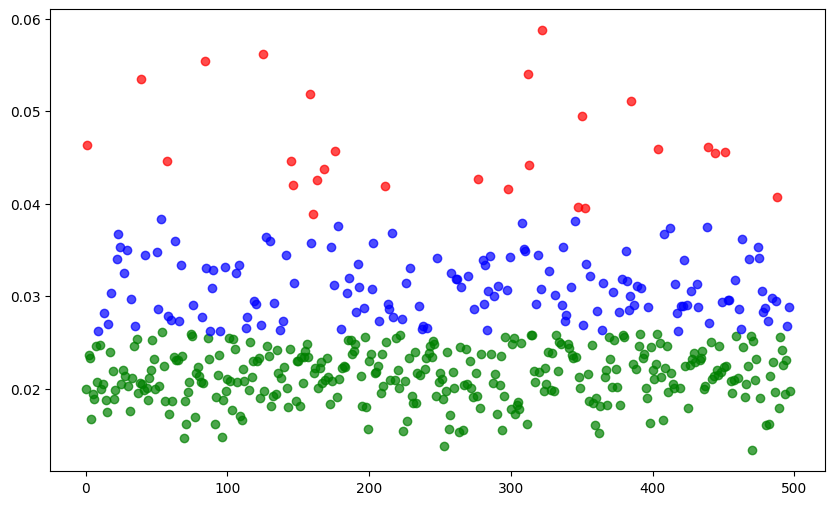

In [9]:
stock_symbols = list(df.columns.values)

# Calculate risk metric (example: standard deviation of daily returns)
risk_metric = closing_prices.pct_change().std()


scaler = MinMaxScaler()
normalized_risk = scaler.fit_transform(risk_metric.values.reshape(-1, 1))

# Apply k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(normalized_risk)

# Get the cluster labels for each stock
cluster_labels = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']  # Colors for the clusters

for i, label in enumerate(cluster_labels):
    plt.scatter(i, risk_metric[i], color=colors[label], alpha=0.7)

# Highlight the high-risk stocks
high_risk_stocks = [stock_symbols[i] for i, label in enumerate(cluster_labels) if label == 2]
high_risk_indices = [i for i, label in enumerate(cluster_labels) if label == 2]



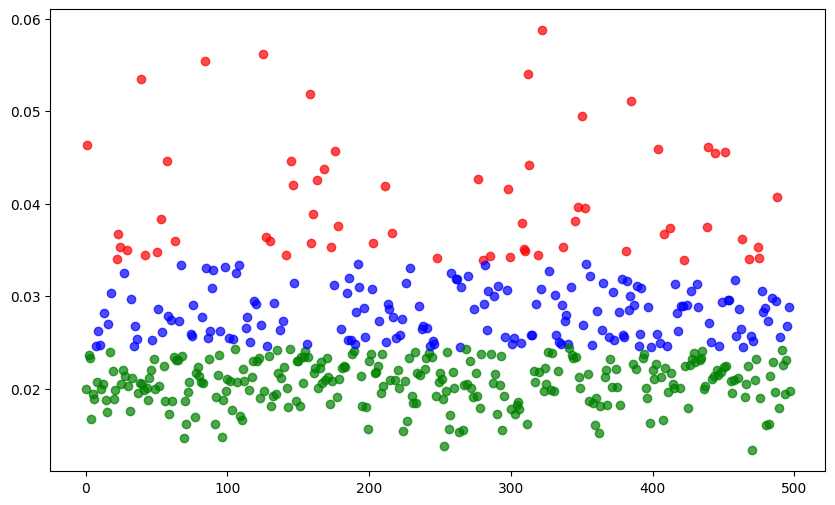

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Calculate risk metric (example: standard deviation of daily returns)
risk_metric = closing_prices.pct_change().std()

# Normalize the risk metric using StandardScaler
scaler = StandardScaler()
normalized_risk = scaler.fit_transform(risk_metric.values.reshape(-1, 1))

# Apply Agglomerative Clustering
n_clusters = 3  # Number of clusters
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(normalized_risk)

# Plot the clustering results
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']  # Colors for the clusters

for i, label in enumerate(cluster_labels):
    plt.scatter(i, risk_metric[i], color=colors[label % len(colors)], alpha=0.7)

# Highlight the high-risk stocks
high_risk_stocks = [stock_symbols[i] for i, label in enumerate(cluster_labels) if label == 2]
high_risk_indices = [i for i, label in enumerate(cluster_labels) if label == 2]
